In [1]:
from planet4 import io

In [3]:
p = io.analysis_folder() / 'catalog_2016_04_13' / 'applied_cut_0.5'

In [5]:
p = io.analysis_folder() / 'catalog_2016_04_13'

In [31]:
p

PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/catalog_2016_04_13/applied_cut_0.5')

In [4]:
def hunt_bug(fname):
    df = pd.read_csv(fname)
    return (df[df.duplicated()].shape[0])

In [5]:
fnames = p.glob('*.csv')
obsids = []
no_of_dupes = []
kind = []
for fname in fnames:
    tokens = fname.name.split('_')
    obsids.append('_'.join(tokens[:3]))
    kind.append(tokens[3].split('.')[0])
    no_of_dupes.append(hunt_bug(fname))

In [6]:
df = pd.DataFrame(dict(obsids=obsids, no_of_dupes=no_of_dupes,
                       kind=kind))

In [7]:
from hirise import hirise_tools as ht

In [8]:
df['orbit'] = df.obsids.map(lambda x: int(ht.OBSERVATION_ID(x).orbit))

In [9]:
%matplotlib inline

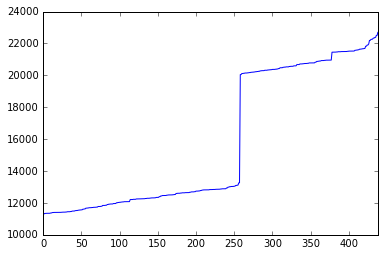

In [10]:
df.orbit.plot()

In [11]:
df[df.orbit < 18000].head(15)

,kind,no_of_dupes,obsids,orbit
0,blotches,1585,ESP_011296_0975,11296
1,fans,3407,ESP_011296_0975,11296
2,blotches,5,ESP_011341_0980,11341
3,fans,3,ESP_011341_0980,11341
4,blotches,3,ESP_011348_0950,11348
5,fans,0,ESP_011348_0950,11348
6,blotches,160,ESP_011350_0945,11350
7,fans,231,ESP_011350_0945,11350
8,blotches,276,ESP_011351_0945,11351
9,fans,1097,ESP_011351_0945,11351


# reproduce

In [3]:
obsid = 'ESP_011296_0975'

In [6]:
fnames = list(p.glob(obsid+'*.csv'))
fnames

[PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/catalog_2016_04_13/ESP_011296_0975_blotches.csv'),
 PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/catalog_2016_04_13/ESP_011296_0975_fans.csv'),
 PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/catalog_2016_04_13/ESP_011296_0975_fnotches.csv')]

In [7]:
blotches = pd.read_csv(fnames[0])
fans = pd.read_csv(fnames[1])
# fnotches = pd.read_csv(fnames[2])

In [8]:
for item in [blotches,fans]:
    print(item.duplicated().value_counts())

False    151
dtype: int64
False    478
dtype: int64
